# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training VGG16 with ground truths and using customized learning rate scheduler function',
        'tags': ['vgg16', 'ground truths'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
        #'tagger_model': OpenfaceMouth(),
        #'dl_names': [DLName.FVC_PYBOSSA, DLName.GENKI4K_DB, DLName.FEI_DB, DLName.CALTECH, DLName.IMFDB, DLName.GEORGIA_TECH],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True,
        'use_gt_data': True,
        'gt_names': [GTName.GENKI, GTName.FVC],
        'balance_input_data': False,
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 100,
        'early_stopping': 30,
        'shuffle': False,
        'dense_units': 128,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAM_CUST,
        'dropout': 0.5,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training VGG16 with ground truths and using '
                               'customized learning rate scheduler function',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16', 'ground truths']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f547a95d820>}>,
                      'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.5,
                      'early_stopping': 30,
                      'learning_rate': 0.001,
                      'n_epochs': 100,
                      'optimizer': <Optimizer.ADAM_CUST: 'AdamCustomized'>,
                      'seed': 42,
                      'shuffle': False,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
                      'validation_pr

# Load Data

In [4]:
trainer.load_training_data()

Loading data
len(files_list_train):  5210
len(files_list_val):  570
labels_train.shape: (5210,23)
labels_val.shape: (570,23)
Ground Thruth shape:  (5780, 23)
..Ignoring 409 dummy and empty label values
len(files_list_train):  3990
labels_train.shape: (3990, 1)
Ground Thruth shape:  (3990, 1)
..Ignoring 0 dummy and empty label values
Input data.shape: (9361, 4)
Number of Samples: 9361
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 8004 validated image filenames belonging to 2 classes.
Found 889 validated image filenames belonging to 2 classes.
Found 468 validated image filenames belonging to 2 classes.
TOTAL: 9361


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-70


# Training Model

In [8]:
trainer.train_model()

Training VGG16 network
Epoch 1/100
125/125 [==============================] - 67s 538ms/step - loss: 0.5247 - accuracy: 0.7447 - val_loss: 0.4554 - val_accuracy: 0.7812
Epoch 2/100
125/125 [==============================] - 66s 524ms/step - loss: 0.4492 - accuracy: 0.7878 - val_loss: 0.4222 - val_accuracy: 0.8053
Epoch 3/100
125/125 [==============================] - 66s 527ms/step - loss: 0.4354 - accuracy: 0.7999 - val_loss: 0.4216 - val_accuracy: 0.7993
Epoch 4/100
125/125 [==============================] - 66s 532ms/step - loss: 0.4197 - accuracy: 0.8049 - val_loss: 0.4168 - val_accuracy: 0.8149
Epoch 5/100
125/125 [==============================] - 67s 538ms/step - loss: 0.3978 - accuracy: 0.8180 - val_loss: 0.3809 - val_accuracy: 0.8293
Epoch 6/100
125/125 [==============================] - 69s 549ms/step - loss: 0.3973 - accuracy: 0.8189 - val_loss: 0.3890 - val_accuracy: 0.8329
Epoch 7/100
125/125 [==============================] - 69s 554ms/step - loss: 0.4009 - accuracy: 0.81

In [9]:
trainer.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

# Plots

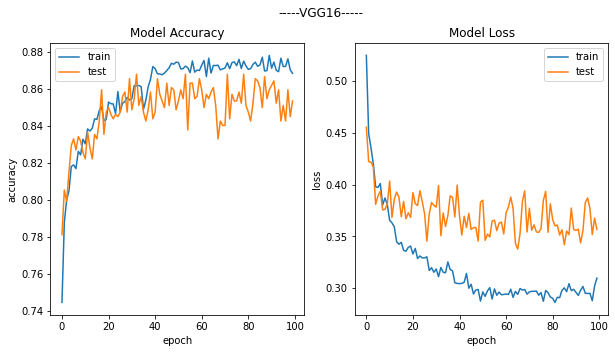

In [10]:
trainer.draw_training_history()

# Saving Trained Model

In [11]:
trainer.save_model()

Saving model


# Test Trained Model

In [12]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.81      0.79      0.80       171
        COMP       0.88      0.90      0.89       297

    accuracy                           0.86       468
   macro avg       0.85      0.84      0.84       468
weighted avg       0.86      0.86      0.86       468

Model Accuracy: 0.8568


# Evaluate Model

In [13]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.374
TEST accuracy:  0.8376


# Vizualize Model Classification

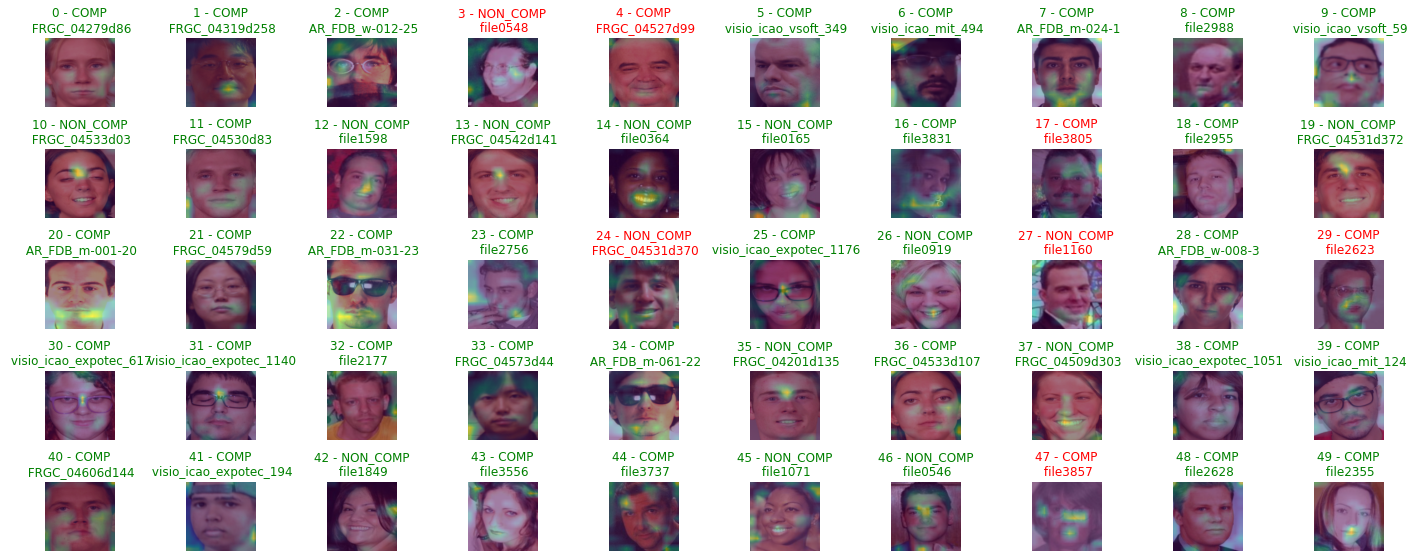

In [14]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [15]:
trainer.finish_experiment()

Finishing Neptune
